In [1]:
# Program diagonalizes the pairing problem from Chapter 8 of Lectures Notes in Physics 936.
# The simple and direct implementation does not exploit the sparsity of the problem, which 
#    limits its applicability to matrix dimensions of a few thousands only.  
#
# Thomas Papenbrock, July 2018

import numpy as np

def find_configurations(levels,pairs):
    """
    Function enumerates and indentifies all ways to distribute pairs over levels.
    Its cost is 2**levels.
    
    param levels               : number of doubly degenerate levels
    param pairs                : number of pairs
    return num_states, configs : number of configurations, list of strings corresponding to configurations
    """
# enumerate and indentify all states. Procedure: In second quantization, levels are occupied (1) or unoccupied (0), 
# making each configuration a string of bits.
# Idea: loop over all relevant numbers from 1 to 2**levels, convert to a binary number (represented as a string)
    num_states=0
    configs=[]
    for n in range(2**levels):  # loop over all integers consisting of as many bits as there are levels.   
        binary=format(n,'b')  # converts integer to binary string
        if binary.count("1") == pairs: # decide whether there are as many bits set as there are pairs 
            num_states= num_states +1 
            configs.append(binary)
        
    return num_states, configs


def strings_to_numpy_array(configs):
    """
    Converts strings corresponding to configurations to numpy arrays for further processing
    
    param configs     : list of strings of 1s and 0s.
    return vec_configs: list of numpy arrays (vectors) corresponding to strings
    """
    # convert configurations for further processing as numpy arrays
    vec_configs=[]
    for config in configs:
        mylen=len(config)
        vec=np.zeros(levels, dtype=int) #numpy array of integers, set to zero
        for i, letter in enumerate(config):
            if letter == '1': vec[mylen-1-i]=1  # store in reverse order
        vec_configs.append(vec)

    return vec_configs

def connected_by_pairing_interaction(config1, config2):
    """
    Tests if config1 and config2 differ by the occupation of one pair
    
    param confi1, config2: numpy arrays of 1s and 0s
    return               : True or False
    """
    pairs_in_config1 = np.dot(config1,config1)
    pairs_in_config2 = np.dot(config2,config2)
    if pairs_in_config1 != pairs_in_config2: # states should not have different particle numbers
        return False
    common = np.dot(config1,config2) # number of common occupied levels
    if common == pairs_in_config1 - 1: #configs differ by one pair
        return True
    
def get_hamiltonian(delta,g_pair,vec_configs):
    """
    Computes the Hamiltonian matrix for pairing problem.
    
    param delta        : level spacing
    param g_pair       : pairing strength
    param vec_configs  : configurations in Hilbert space
    return hamiltonian : numpy array of Hamiltonian matrix 
    """
    num_states = len(vec_configs)
    hamiltonian=np.zeros((num_states,num_states),order='F')
    # off-diagonal matrix elements
    for i, config1 in enumerate(vec_configs):
        for j, config2 in enumerate(vec_configs):
            if connected_by_pairing_interaction(config1, config2):
                hamiltonian[j,i]= -0.5*g_pair
    # diagonal matrix elements
    for i, config in enumerate(vec_configs):
        hamiltonian[i,i]=0.0
        for j, occ in enumerate(config):
            hamiltonian[i,i] = hamiltonian[i,i] + (2*j*delta - 0.5*g_pair)*occ
        
    return hamiltonian

In [6]:
######## main program starts here

# input parameters for basis
pairs  = 6  # the number of pairs; equals 2 in Lecture Notes of Physics 936
levels = 12  # the number of doubly degenerate levels; equals 4 in Lecture Notes of Physics 936

# get configurations
num_states, configs = find_configurations(levels,pairs)

print('dimension of Hilbert space:', num_states)
if num_states <= 10: print(configs)

# convert to numpy arrays
vec_configs = strings_to_numpy_array(configs)
if num_states <= 10: print(vec_configs)


# parameters of the Hamiltonian
g_pair = 1.0
delta = 1.0

if num_states < 10000: # build and fully diagonalize Hamiltonian 
    hamiltonian = get_hamiltonian(delta,g_pair,vec_configs)
    if num_states <= 10: print(hamiltonian)

    e_ref = hamiltonian[0,0]
    print("reference energy:", e_ref)

    vals, vecs = np.linalg.eigh(hamiltonian)
    print('gs energy:', vals[0])

    e_corr = vals[0]-e_ref
    print('correlation energy:', e_corr)
    
else: print('dimension too large for full diagonalization:', num_states)

dimension of Hilbert space: 924
reference energy: 27.0
gs energy: 24.8391727485
correlation energy: -2.16082725155


Populating the interactive namespace from numpy and matplotlib


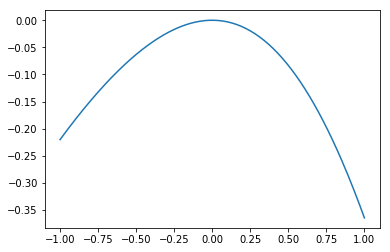

In [3]:
# Plot of the correlation energy as in Chapter 8 of Lectures Notes in Physics 936

import matplotlib.pyplot as plt

%pylab inline

# input parameters for basis
pairs  = 2  # the number of pairs
levels = 4  # the number of doubly degenerate levels

# get configurations
num_states, configs = find_configurations(levels,pairs)

# convert to numpy arrays
vec_configs = strings_to_numpy_array(configs)


# parameters of the Hamiltonian, make plots
delta = 1.0
g_pair = np.linspace(-1.0, 1.0, 201)
e_corr = np.zeros_like(g_pair)



for i, gg in enumerate(g_pair):
    hamiltonian = get_hamiltonian(delta,gg,vec_configs)
    e_ref = hamiltonian[0,0]
    vals, vecs = np.linalg.eigh(hamiltonian) # diagonalize
    e_corr[i] = vals[0]-e_ref #correlation energy


plt.plot(g_pair,e_corr)
plt.show()